(4500, 32)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ -5.6344767   3.3560174]
 [ -7.4533095   1.2070453]
 [ -4.987011    2.504408 ]
 ...
 [-19.86449   -20.12702  ]
 [-19.86449   -20.12702  ]
 [-17.309727  -17.338493 ]]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4500 samples in 0.001s...


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 4500 samples in 0.426s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4500
[t-SNE] Computed conditional probabilities for sample 2000 / 4500
[t-SNE] Computed conditional probabilities for sample 3000 / 4500
[t-SNE] Computed conditional probabilities for sample 4000 / 4500
[t-SNE] Computed conditional probabilities for sample 4500 / 4500
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 1.769s
[t-SNE] Iteration 50: error = 68.7664642, gradient norm = 0.1143399 (50 iterations in 2.061s)
[t-SNE] Iteration 100: error = 50.7770615, gradient norm = 0.0599452 (50 iterations in 1.684s)
[t-SNE] Iteration 150: error = 47.6153831, gradient norm = 0.0475906 (50 iterations in 1.541s)
[t-SNE] Iteration 200: error = 44.2839127, gradient norm = 0.0382839 (50 iterations in 1.727s)
[t-SNE] Iteration 250: error = 43.2811203, gradient norm = 0.0353395 (50 iterations in 1.320s)
[t-SNE] KL divergence after 250 iterations with early exa

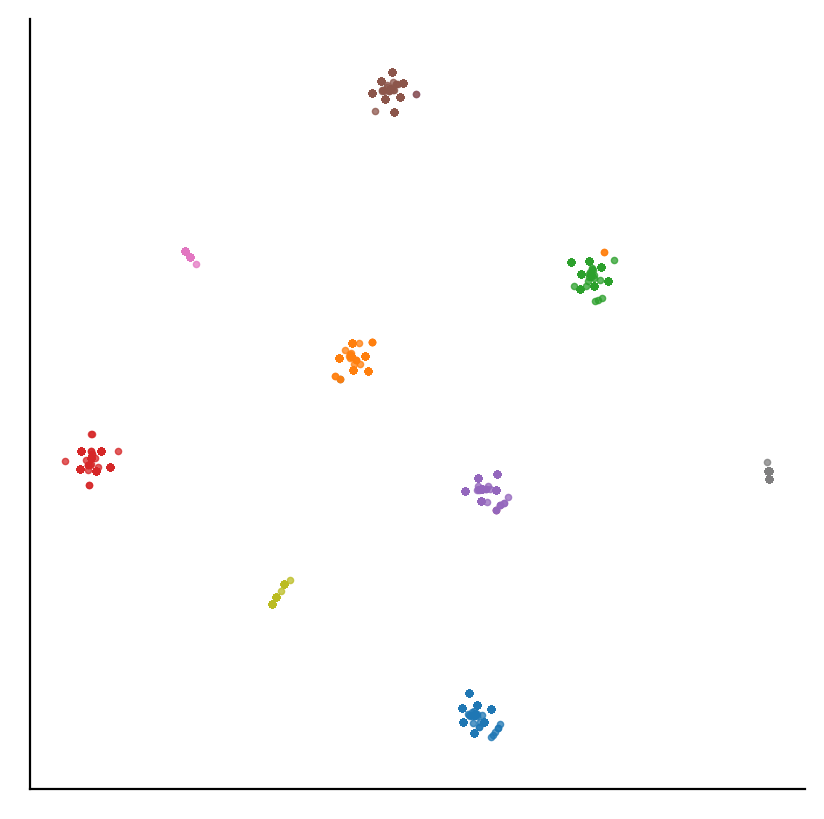

In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import scipy.io as sio
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import openTSNE


xdat = loadtxt("tSNE_MDdata.dat", comments="#", delimiter=",", unpack=False)
print(np.shape(xdat))

model = TSNE(n_components=2, random_state=0)
x=xdat
rd = model.fit_transform(x) 
print(rd)

frd = 1000; frs = 500

values = TSNE(n_components=2, verbose=2).fit_transform(x)

plt.figure(figsize=(5,5), dpi=200)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.scatter(values[:frd-frs+1,0], values[:frd-frs+1,1], marker='.', color='tab:blue', alpha=0.75, linewidth=.5, s=20, label="Br-Cubic")
plt.scatter(values[frd-frs+1:2*(frd-frs+1),0], values[frd-frs+1:2*(frd-frs+1),1], marker='.', color='tab:orange', alpha=0.75,  linewidth=0.5, s=20, label="Br-Ortho")
plt.scatter(values[2*(frd-frs+1):3*(frd-frs+1),0], values[2*(frd-frs+1):3*(frd-frs+1),1], marker='.', color='tab:green', alpha=0.75,  linewidth=0.5, s=20, label="Br-Tetra")

plt.scatter(values[3*(frd-frs+1):4*(frd-frs+1),0], values[3*(frd-frs+1):4*(frd-frs+1),1], marker='.', color='tab:red', alpha=0.75,  linewidth=0.5, s=20, label="Cl-Cubic")
plt.scatter(values[4*(frd-frs+1):5*(frd-frs+1),0], values[4*(frd-frs+1):5*(frd-frs+1),1], marker='.', color='tab:purple', alpha=0.75,  linewidth=0.5, s=20, label="Cl-Ortho")
plt.scatter(values[5*(frd-frs+1):6*(frd-frs+1),0], values[5*(frd-frs+1):6*(frd-frs+1),1], marker='.', color='tab:brown', alpha=0.75,  linewidth=0.5, s=20, label="Cl-Tetra")

plt.scatter(values[6*(frd-frs+1):7*(frd-frs+1),0], values[6*(frd-frs+1):7*(frd-frs+1),1],  marker='.',color='tab:pink', alpha=0.75,  linewidth=0.5, s=20, label="I-Cubic")
plt.scatter(values[7*(frd-frs+1):8*(frd-frs+1),0], values[7*(frd-frs+1):8*(frd-frs+1),1],  marker='.',color='tab:gray', alpha=0.75,  linewidth=0.5, s=20, label="I-Ortho")
plt.scatter(values[8*(frd-frs+1):9*(frd-frs+1),0], values[8*(frd-frs+1):9*(frd-frs+1),1],  marker='.',color='tab:olive', alpha=0.75,  linewidth=0.5, s=20, label="I-Tetra")

#plt.ylim(np.min(values[:, 1])-10, np.max(values[:,1])+50)
#plt.xlim(-100, 100)
#plt.legend(ncol=3, loc='upper left', handlelength=.5, borderpad=.25, fontsize=10)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig("MAPbX3_Clustering_TD_tSNE.png", dpi=400)